<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Pandas (Good)</span></div>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# plt.xkcd()

## 1 Missing data

### 1.1 All missing data

In [2]:
# Initialise dataframe from previous part
df_class = pd.read_excel('dummy-class-1-of-2.xlsx', skiprows=1)

#------------------ Drop and reorganise columns  -----------------#
columns_to_keep = ['Student No', 'Name', 'Major', 'Gender',
                   'Test 1 (30%)', 'Test 2 (20%)']

df_class = df_class[columns_to_keep]

#------------------------- Rename columns ------------------------#
new_column_info = {'Student No': 'MATRIC_NO',
                   'Test 1 (30%)': 'Test 1',
                   'Test 2 (20%)': 'Test 2'}

df_class.rename(columns=new_column_info, inplace=True)

#--------------------- Set index to MATRIC_NO --------------------#
df_class.set_index('MATRIC_NO', drop=False, inplace=True)

#-------------------------- Rename stuff -------------------------#
replace_info = {
    'PHY': 'Physics',
    'CHM': 'Chemistry',
    'LS': 'Life Sciences',
    'CBIO': 'Comp. Biology',
    'F': 'Female',
    'M': 'Male',
    'NB': 'Non-binary'
}

df_class.replace(to_replace=replace_info, inplace=True)

#---------------- Remove the ' ' from column Test 2 --------------#


def clean(text):
    '''
    Function to remove ' ' from column 'Test 2'.
    To be applied using apply()
    '''
    try:
        return text.replace("'", "")
    except AttributeError:
        # This will handle the NaN of the missing data
        return text


df_class['Test 2'] = df_class['Test 2'].apply(clean)

#--------------- Convert column Test 2 to type float -------------#
new_type_info = {'Major': 'category',
                 'Gender': 'category',
                 'Test 2': 'float'}

df_class = df_class.astype(new_type_info)

In [3]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, A3028967J to A7667457P
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MATRIC_NO  35 non-null     object  
 1   Name       35 non-null     object  
 2   Major      35 non-null     category
 3   Gender     35 non-null     category
 4   Test 1     33 non-null     float64 
 5   Test 2     32 non-null     float64 
dtypes: category(2), float64(2), object(2)
memory usage: 1.8+ KB


In [4]:
df_class.isna()

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2
MATRIC_NO,,,,,,
A3028967J,False,False,False,False,False,False
A1282849W,False,False,False,False,False,False
A5408925A,False,False,False,False,False,False
A6973859L,False,False,False,False,False,False
A5410124H,False,False,False,False,False,True
A9568373Q,False,False,False,False,False,False
A6824244G,False,False,False,False,False,False
A9194090U,False,False,False,False,False,False
A4828364M,False,False,False,False,False,False


### 1.2 Columns and rows of the missing data

In [5]:
# axis=0 means that the any function acts along the index i.e. over the column
df_class.isna().any(axis=0)      # Are there any True in the columns?

MATRIC_NO    False
Name         False
Major        False
Gender       False
Test 1        True
Test 2        True
dtype: bool

In [6]:
# axis=1 means that the any function acts along the columns i.e. over the index
df_class.isna().any(axis=1)      # Are there any True in the rows?

MATRIC_NO
A3028967J    False
A1282849W    False
A5408925A    False
A6973859L    False
A5410124H     True
A9568373Q    False
A6824244G    False
A9194090U    False
A4828364M    False
A4607700C    False
A7067766E    False
A5569996J    False
A3202548I    False
A6131593U    False
A7653832E     True
A9462811I    False
A1218599T    False
A7210476B    False
A1512479K    False
A7986368Y    False
A2727061A     True
A2999472W    False
A7116486E    False
A6931452S    False
A9649096H    False
A1643380L    False
A6787293E    False
A5975988J    False
A3699958T     True
A1956366U    False
A1468689D    False
A3217320C    False
A6867791C    False
A4080490P    False
A7667457P    False
dtype: bool

### 1.3 More details of the missing numbers

In [7]:
# Your code here
mask_for_nan = df_class.isna().any(axis=1)
df_class[mask_for_nan]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2
MATRIC_NO,,,,,,
A5410124H,A5410124H,Kyla Young,Physics,Male,15.306,NaN
A7653832E,A7653832E,Quentin Kemp,Chemistry,Female,NaN,15.72
A2727061A,A2727061A,Malik Becker,Physics,Male,12.858,NaN
A3699958T,A3699958T,Norah Miles,Chemistry,Male,NaN,NaN


### 1.4 Dealing with missing numbers?

In [8]:
# Your code here
nine_df_class = df_class.fillna(99999)
nine_df_class[mask_for_nan]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2
MATRIC_NO,,,,,,
A5410124H,A5410124H,Kyla Young,Physics,Male,15.306,99999.00
A7653832E,A7653832E,Quentin Kemp,Chemistry,Female,99999.000,15.72
A2727061A,A2727061A,Malik Becker,Physics,Male,12.858,99999.00
A3699958T,A3699958T,Norah Miles,Chemistry,Male,99999.000,99999.00


In [9]:
nine_df_class.replace(99999, 0, inplace = True)
nine_df_class[mask_for_nan]

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2
MATRIC_NO,,,,,,
A5410124H,A5410124H,Kyla Young,Physics,Male,15.306,0.00
A7653832E,A7653832E,Quentin Kemp,Chemistry,Female,0.000,15.72
A2727061A,A2727061A,Malik Becker,Physics,Male,12.858,0.00
A3699958T,A3699958T,Norah Miles,Chemistry,Male,0.000,0.00


In [10]:
# Removes all the columns with NaN (don't do this for this dataset)
mask_for_nan_columns = df_class.isna().any(axis=0)
columns_to_keep = df_class.columns[~mask_for_nan_columns].values
df_class_removed_cols = df_class[columns_to_keep]

In [11]:
df_class_removed_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, A3028967J to A7667457P
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MATRIC_NO  35 non-null     object  
 1   Name       35 non-null     object  
 2   Major      35 non-null     category
 3   Gender     35 non-null     category
dtypes: category(2), object(2)
memory usage: 2.3+ KB


In [12]:
# Removes all rows with NaN
df_class.dropna(axis = 0).info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, A3028967J to A7667457P
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MATRIC_NO  31 non-null     object  
 1   Name       31 non-null     object  
 2   Major      31 non-null     category
 3   Gender     31 non-null     category
 4   Test 1     31 non-null     float64 
 5   Test 2     31 non-null     float64 
dtypes: category(2), float64(2), object(2)
memory usage: 1.6+ KB


In [13]:
# Removes rows with NaN with a mask, similar to the dropna function above
df_class_removed_rows = df_class[~mask_for_nan]
df_class_removed_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, A3028967J to A7667457P
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MATRIC_NO  31 non-null     object  
 1   Name       31 non-null     object  
 2   Major      31 non-null     category
 3   Gender     31 non-null     category
 4   Test 1     31 non-null     float64 
 5   Test 2     31 non-null     float64 
dtypes: category(2), float64(2), object(2)
memory usage: 1.6+ KB


### 1.5 Itterating over a dataframe

In [14]:
# Iterates over the rows in the dataframe
for index, row in df_class.iterrows():
    name = row['Name']

    for column in ['Test 1', 'Test 2']:
        # Check if the 'Test 1' and 'Test 2' values in the row are NaN
        if np.isnan(row[column]):
            print(f'{index}: {name:<15}  missing data for {column}')
            # df_class.loc[index, column] = 0

A5410124H: Kyla Young       missing data for Test 2
A7653832E: Quentin Kemp     missing data for Test 1
A2727061A: Malik Becker     missing data for Test 2
A3699958T: Norah Miles      missing data for Test 1
A3699958T: Norah Miles      missing data for Test 2


In [15]:
# Doing it via columns instead since that's much faster
for title, col in df_class[['Test 1', 'Test 2']].items():
    for index, item in col.items():
        if np.isnan(item):
            print(f'{index}: {df_class.loc[index, "Name"]:<15}  missing data for {title}')

A7653832E: Quentin Kemp     missing data for Test 1
A3699958T: Norah Miles      missing data for Test 1
A5410124H: Kyla Young       missing data for Test 2
A2727061A: Malik Becker     missing data for Test 2
A3699958T: Norah Miles      missing data for Test 2


## 2 Combining dataframes

In [16]:
# Import dummy class 2
df_class_2 = pd.read_excel('dummy-class-2-of-2.xlsx')

#------------------------- Rename columns ------------------------#
new_column_info = {'Student No': 'MATRIC_NO',
                   'Test 3 (50%)': 'Test 3'}

df_class_2.rename(columns=new_column_info, inplace=True)

#--------------------- Set index to MATRIC_NO --------------------#
df_class_2.set_index('MATRIC_NO', inplace=True)

df_class_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, A3028967J to A4080490P
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Test 3  31 non-null     float64
dtypes: float64(1)
memory usage: 496.0+ bytes


In [17]:
# Concatenate along columns
df_combined = pd.concat([df_class, df_class_2], axis=1)

In [18]:
df_combined

,MATRIC_NO,Name,Major,Gender,Test 1,Test 2,Test 3
MATRIC_NO,,,,,,,
A3028967J,A3028967J,Braiden Henson,Physics,Male,20.205,18.960,21.25
A1282849W,A1282849W,Gustavo Vang,Chemistry,Female,13.470,17.440,18.75
A5408925A,A5408925A,Ronin Christian,Physics,Male,18.366,15.560,43.75
A6973859L,A6973859L,Owen Anderson,Life Sciences,Female,18.366,16.360,18.75
A5410124H,A5410124H,Kyla Young,Physics,Male,15.306,NaN,17.50
A9568373Q,A9568373Q,Wyatt Oliver,Physics,Male,12.246,14.088,32.50
A6824244G,A6824244G,Essence Bauer,Life Sciences,Male,16.530,16.720,31.25
A9194090U,A9194090U,Maryjane Sandoval,Life Sciences,Female,18.981,16.400,43.75
A4828364M,A4828364M,Carl Trujillo,Life Sciences,Non-binary,15.306,13.680,47.50


### 2.1 The complete recipe

In [19]:
# Get rid of the NaNs and combine the 3 test results into a totals column
df_combined.fillna(0, inplace=True)
df_combined["Total"] = df_combined[["Test 1", "Test 2", "Test 3"]].sum(axis=1)
df_combined.sort_values(by='Total', inplace=True)
df_combined = df_combined.round(2)

## 3 Plotting directly from Pandas

### 3.1 Barcharts

In [20]:
plt.style.use("seaborn-dark")

/tmp/ipykernel_46484/599120892.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")


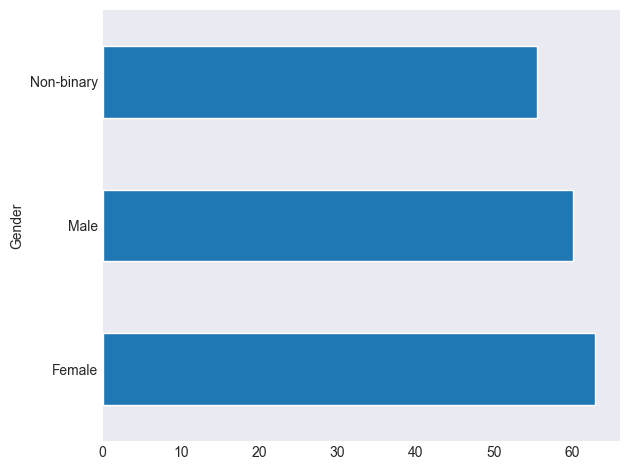

In [21]:
# Calculate the average score for different genders
grp = df_combined.groupby(['Gender'])["Total"]
grp.mean().plot(kind='barh')
plt.tight_layout()
plt.show()

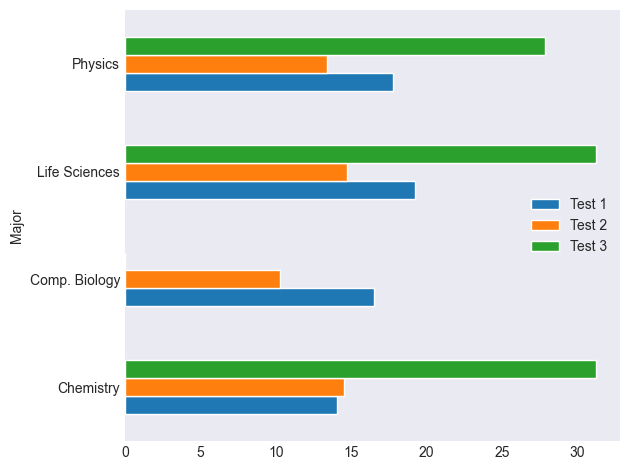

In [22]:
# Calculate the average scores for different majors
grp = df_combined.groupby(['Major'])[["Test 1", "Test 2", "Test 3"]]
grp.mean().plot(kind='barh')
plt.tight_layout()
plt.show()

### 3.2 Histograms

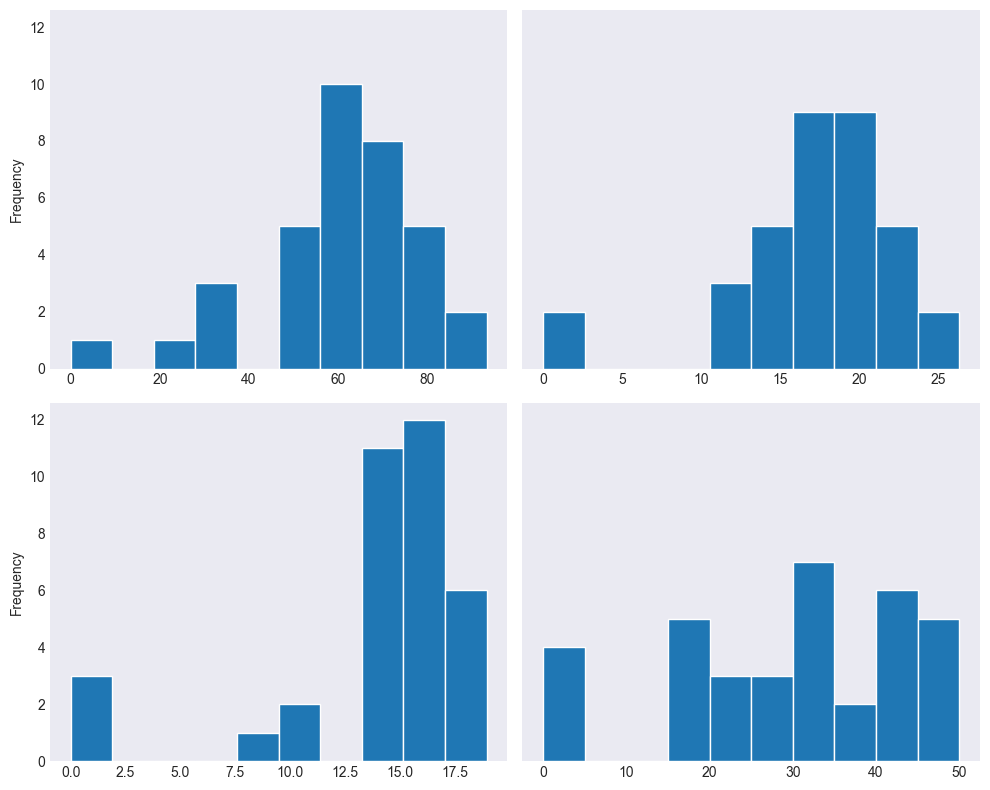

In [26]:
# Plotting the different test result distributions on different histograms
fix, ax = plt.subplots(nrows=2, ncols=2, sharey=True, figsize=(10,8))
df_combined['Total'].plot.hist(ax=ax[0, 0])
df_combined['Test 1'].plot.hist(ax=ax[0, 1])
df_combined['Test 2'].plot.hist(ax=ax[1, 0])
df_combined['Test 3'].plot.hist(ax=ax[1, 1])
plt.tight_layout()
plt.show()

### 3.3 Pie

<AxesSubplot: >

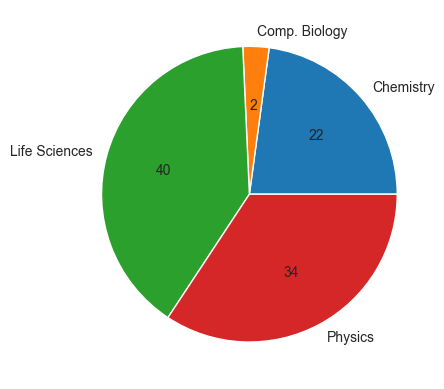

In [27]:
# Plot the number of each major
df_combined.groupby('Major').size().plot.pie(autopct="%d")

### 3.4 Boxplots

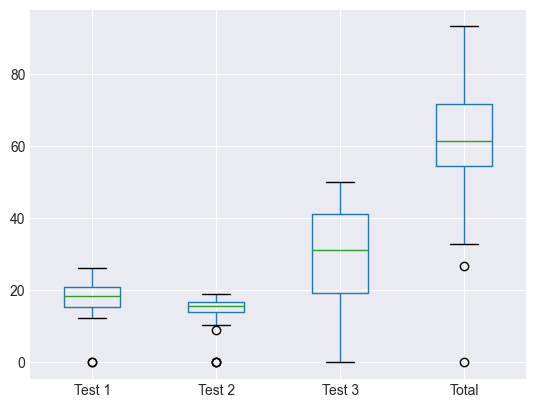

In [29]:
# Your code here
df_combined.boxplot()
plt.show()

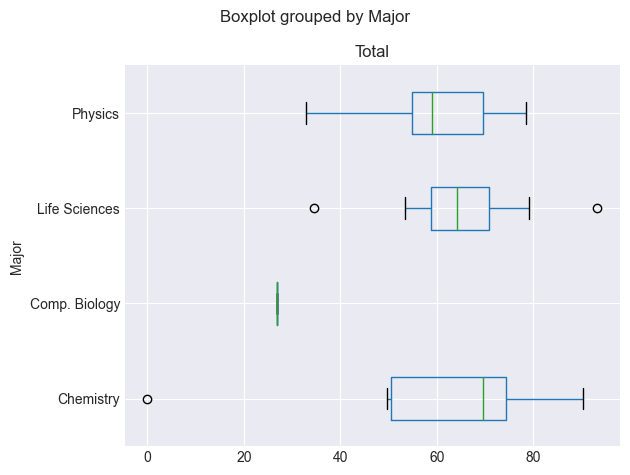

In [31]:
# Plotting a boxplot by major
df_combined.boxplot(by='Major', column=['Total'], vert=False)
plt.tight_layout()
plt.show()

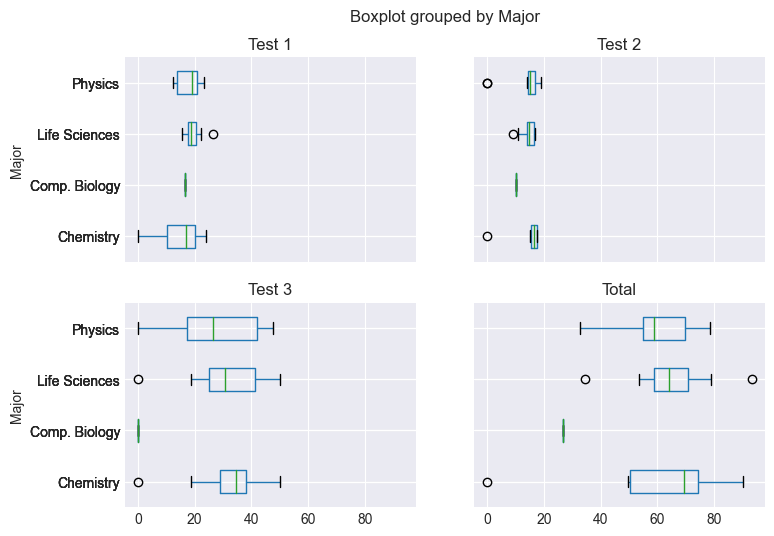

In [32]:
# Plotting separate boxplots by major for the 3 different tests and total
df_combined.boxplot(by='Major',
                    column=['Test 1', 'Test 2', 'Test 3', 'Total'],
                    vert=False, figsize=(8, 6));
plt.show()

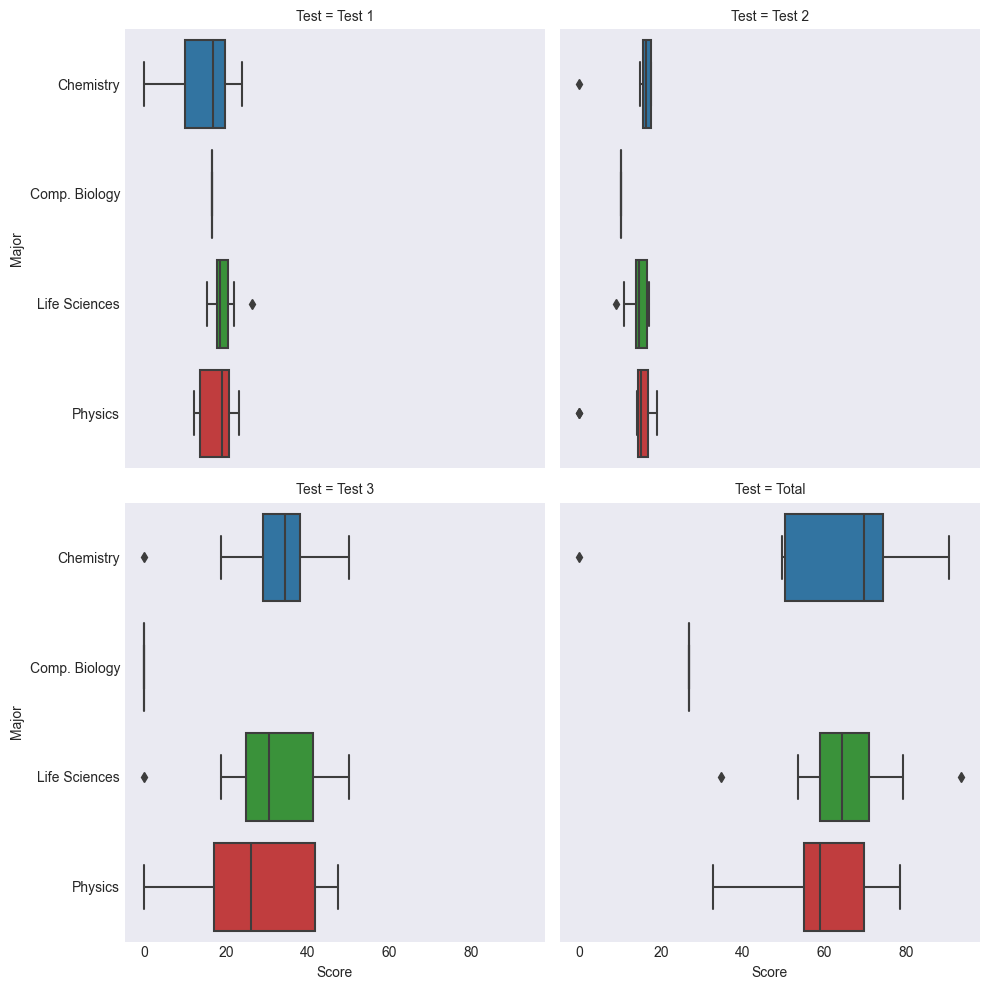

In [51]:
# Doing something similar with seaborn
# Converting the wide-form test data into long-form
df_combined_sns = pd.melt(df_combined, ['MATRIC_NO', 'Name', 'Major', 'Gender'], var_name="Test", value_name="Score")
# Plotting the same data as above
sns.catplot(data=df_combined_sns, x='Score', y='Major', col="Test", kind="box", col_wrap=2)

## Exercise 1 :  Oh no! Yet another class!

In [62]:
# Import data into pandas dataframes
df_names = pd.read_excel("class_names.xlsx")
df_names.set_index("Student No", inplace=True)

df_test_1 = pd.read_excel("class_test-01.xlsx")
df_test_1.rename(columns={"Score":"Test 1"}, inplace = True)
df_test_1.set_index("Student No", inplace = True)

df_test_2 = pd.read_excel("class_test-02.xlsx")
df_test_2.rename(columns={"Score":"Test 2"}, inplace = True)
df_test_2.set_index("Student No", inplace = True)

# Concat the data together
df_final_scores = pd.concat([df_names, df_test_1, df_test_2], axis=1)
df_final_scores.fillna(0, inplace=True)

# Calculate final scores
df_final_scores["Total"] = df_final_scores["Test 1"] * 35/25 + df_final_scores["Test 2"] * 65/35
df_final_scores[["Name", "Total"]]

,Name,Total
Student No,,
A80082135P,Delmer Ferland,60.599143
A75939995U,Jonell Teske,22.288000
A97067760C,Cathern Kerwin,21.224000
A31152769E,Tandra Kunz,53.302286
A23853411O,Bryanna Ash,60.794857
A51101573L,Helena Crandell,0.000000
A39424921D,Douglas Punc,63.826857
A28951274W,Anderson Maxie,57.707143
A04222051I,Sidney Warthen,57.230857
